
# Prosit 4

### Methodes utilises 

* Métaheuristiques par trajectoire </br>
    Ces méthodes améliorent une seule solution en la modifiant progressivement (recherche locale améliorée).</br>
    * Recuit simulé (Simulated Annealing)
        * Bonne capacité à sortir des optima locaux grâce à une probabilité d’acceptation décroissante.
        * Facile à implémenter pour le TSP (par exemple avec des permutations de villes).
    * Recherche tabou (Tabu Search)
        * Mémorise les solutions récemment visitées pour éviter les cycles.
        * Très utilisée pour le TSP avec des structures de voisinage bien définies (2-opt, 3-opt…).
    * GRASP (Greedy Randomized Adaptive Search Procedure)
        * Combine construction gloutonne aléatoire et recherche locale.
        * Adapté au TSP si tu veux éviter trop d’exploration exhaustive.
* Métaheuristiques par population</br>
    Elles manipulent plusieurs solutions simultanément, avec des mécanismes d’échange entre elles.</br>
    * Colonies de fourmis (Ant Colony Optimization)
        * Inspiré du comportement des fourmis qui laissent des traces de phéromones.
        * Très efficace pour le TSP, surtout avec des graphes denses ou de grandes tailles.
    



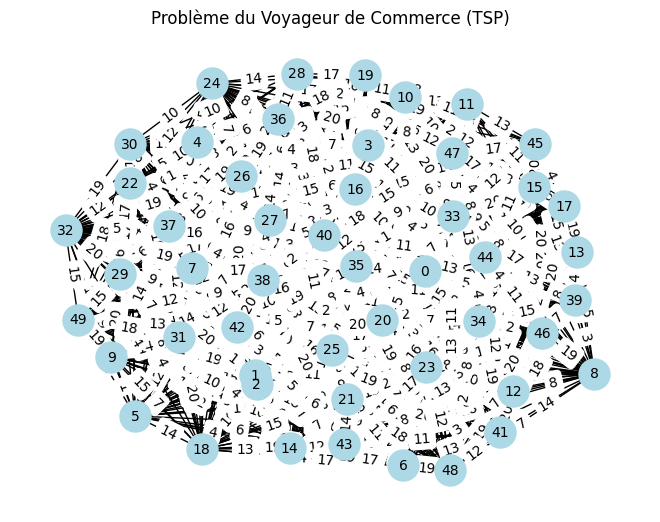

In [2]:
# Fonction pour générer un problème TSP aléatoire

import random
import networkx as nx

import matplotlib.pyplot as plt

# Fonction pour générer un problème TSP aléatoire
def generate_tsp_problem(num_nodes, seed):
    random.seed(seed)
    nodes = list(range(num_nodes))
    graph = nx.complete_graph(nodes)
    
    # Ajouter des poids aléatoires aux arêtes
    for (u, v) in graph.edges():
        graph[u][v]['weight'] = random.randint(1, 20)
    
    return graph

# Paramètres
num_nodes = 50  # Nombre de nœuds
seed = 452       # Seed pour la reproductibilité

# Génération du problème TSP
tsp_graph = generate_tsp_problem(num_nodes, seed)

# Visualisation du graphe
pos = nx.spring_layout(tsp_graph, seed=seed)  # Positionnement des nœuds
nx.draw(tsp_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
labels = nx.get_edge_attributes(tsp_graph, 'weight')
nx.draw_networkx_edge_labels(tsp_graph, pos, edge_labels=labels)
plt.title("Problème du Voyageur de Commerce (TSP)")
plt.show()

####  Recuit simulé (Simulated Annealing) </br>
![Simulated Annealing](https://upload.wikimedia.org/wikipedia/commons/d/d5/Hill_Climbing_with_Simulated_Annealing.gif)

Temps d'exécution : 0.0970 secondes
Meilleur chemin trouvé par Recuit simulé (fixe 0) : [0, 17, 42, 5, 34, 32, 13, 49, 3, 25, 43, 28, 15, 27, 8, 35, 37, 46, 33, 21, 38, 40, 41, 30, 9, 23, 45, 18, 26, 24, 11, 12, 6, 36, 47, 31, 19, 14, 4, 44, 7, 2, 10, 20, 29, 16, 1, 48, 22, 39, 0]
Coût du meilleur chemin : 153


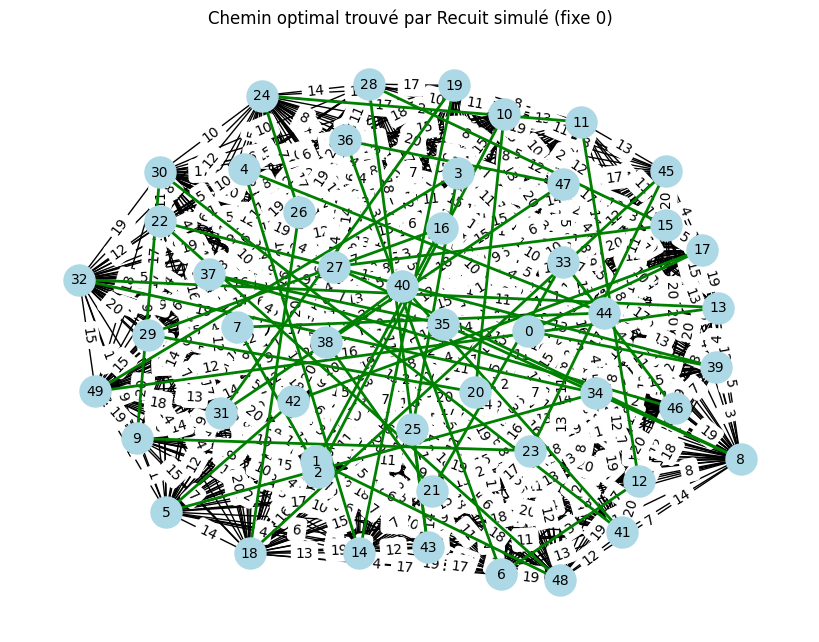

In [3]:
# Fonction pour résoudre le TSP avec l'algorithme de Simulated Annealing
import math
import time  # Importer le module time pour mesurer le temps d'exécution

# Fonction pour calculer la longueur totale d'un chemin
def calculate_path_length(graph, path):
    """
    Calcule la longueur totale d'un chemin donné dans un graphe.
    Le chemin est supposé être un cycle hamiltonien.
    """
    return sum(graph[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)) + graph[path[-1]][path[0]]['weight']

# Fonction pour générer un voisin en effectuant un échange 2-opt
def generate_neighbor_fixed_start(path):
    """
    Génère un voisin en effectuant un échange 2-opt tout en fixant le premier nœud.
    """
    new_path = path[:]
    i, j = random.sample(range(1, len(path)), 2)  # On ne modifie pas le premier nœud
    new_path[i:j+1] = reversed(new_path[i:j+1])  # Inversion des sous-segments
    return new_path

initial_temperature = 1000  # Température initiale
cooling_rate = 0.995  # Taux de refroidissement
max_iterations = 10000 # Nombre maximum d'itérations

# Algorithme de Recuit simulé
def simulated_annealing_fixed_start(graph, initial_temperature, cooling_rate, max_iterations):
    """
    Implémente l'algorithme de Recuit simulé pour trouver un cycle hamiltonien
    qui commence et se termine par le nœud 0.
    """
    # Initialisation

    current_path = list(graph.nodes)
    current_path.remove(0)  # On fixe le nœud 0 au début
    random.shuffle(current_path)
    current_path = [0] + current_path  # Ajouter 0 au début
    current_cost = calculate_path_length(graph, current_path)
    best_path = current_path[:]
    best_cost = current_cost
    temperature = initial_temperature

    for iteration in range(max_iterations):
        # Générer un voisin
        neighbor = generate_neighbor_fixed_start(current_path)
        neighbor_cost = calculate_path_length(graph, neighbor)

        # Calculer la différence de coût
        delta_cost = neighbor_cost - current_cost

        # Décider d'accepter ou non le voisin
        if delta_cost < 0 or random.random() < math.exp(-delta_cost / temperature):
            current_path = neighbor
            current_cost = neighbor_cost

        # Mettre à jour le meilleur chemin trouvé
        if current_cost < best_cost:
            best_path = current_path[:]
            best_cost = current_cost

        # Réduire la température
        temperature *= cooling_rate

        # Arrêter si la température est trop basse
        if temperature < 1e-3:
            break

    return best_path, best_cost

# Exécution de l'algorithme de Recuit simulé
start_time = time.time()
best_path_sa_fixed, best_cost_sa_fixed = simulated_annealing_fixed_start(
    tsp_graph, initial_temperature, cooling_rate, max_iterations
)
end_time = time.time()
execution_time = end_time - start_time
print(f"Temps d'exécution : {execution_time:.4f} secondes")

# Affichage des résultats

print("Meilleur chemin trouvé par Recuit simulé (fixe 0) :", best_path_sa_fixed + [best_path_sa_fixed[0]])
print("Coût du meilleur chemin :", best_cost_sa_fixed)

# Visualisation du chemin emprunté
plt.figure(figsize=(8, 6))
nx.draw(tsp_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edge_labels(tsp_graph, pos, edge_labels=labels)

# Tracer le chemin en vert
path_edges_sa_fixed = [
    (best_path_sa_fixed[i], best_path_sa_fixed[i + 1]) for i in range(len(best_path_sa_fixed) - 1)
] + [(best_path_sa_fixed[-1], best_path_sa_fixed[0])]
nx.draw_networkx_edges(tsp_graph, pos, edgelist=path_edges_sa_fixed, edge_color='green', width=2)

plt.title("Chemin optimal trouvé par Recuit simulé (fixe 0)")
plt.show()


### Explication du code : Résolution du TSP avec l'algorithme de Recuit simulé (Simulated Annealing)

Ce code implémente une version de l'algorithme de Recuit simulé pour résoudre le problème du voyageur de commerce (TSP). Voici une explication détaillée des différentes parties :

#### 1. **Fonction `calculate_path_length`**
Cette fonction calcule la longueur totale d'un chemin donné dans un graphe. Le chemin est supposé être un cycle hamiltonien (il commence et se termine au même nœud).
- Elle parcourt les arêtes du chemin et additionne leurs poids.
- Le poids de l'arête reliant le dernier nœud au premier est également inclus.

#### 2. **Fonction `generate_neighbor_fixed_start`**
Cette fonction génère un voisin du chemin actuel en effectuant un échange 2-opt (inversion d'un sous-segment du chemin).
- Le premier nœud est fixé (nœud de départ).
- Deux indices aléatoires sont choisis pour inverser une partie du chemin.

#### 3. **Fonction `simulated_annealing_fixed_start`**
Cette fonction implémente l'algorithme de Recuit simulé pour trouver un cycle hamiltonien optimal.
- **Initialisation** :
    - Le chemin initial est généré en fixant le nœud 0 comme point de départ.
    - La température initiale, le coût du chemin et le meilleur chemin sont définis.
- **Boucle principale** :
    - Un voisin est généré à l'aide de `generate_neighbor_fixed_start`.
    - La différence de coût entre le voisin et le chemin actuel est calculée.
    - Le voisin est accepté si :
        - Il améliore le coût (delta_cost < 0).
        - Ou avec une probabilité dépendant de la température (pour éviter les optima locaux).
    - Si le voisin est accepté, le chemin actuel est mis à jour.
    - Si le chemin actuel est meilleur que le meilleur chemin trouvé, il est enregistré.
    - La température est réduite à chaque itération (selon le `cooling_rate`).
    - La boucle s'arrête si la température devient trop basse.
- **Retour** :
    - La fonction retourne le meilleur chemin et son coût.

#### 4. **Exécution de l'algorithme**
- L'algorithme est exécuté avec les paramètres définis (`initial_temperature`, `cooling_rate`, `max_iterations`).
- Les résultats (meilleur chemin et coût) sont affichés.

#### 5. **Visualisation**
- Le graphe TSP est dessiné avec les nœuds et les poids des arêtes.
- Le chemin optimal trouvé par l'algorithme est tracé en vert.

#### Points clés :
- **Recuit simulé** : Cet algorithme est inspiré du processus de refroidissement des métaux. Il permet d'explorer des solutions sous-optimales pour éviter les optima locaux.
- **Fixation du nœud de départ** : Le nœud 0 est fixé comme point de départ pour simplifier le problème.
- **Visualisation** : Le chemin optimal est visualisé pour mieux comprendre les résultats.

Ce code est utile pour résoudre des instances du TSP de petite taille et illustre bien le fonctionnement du Recuit simulé.


#### Recherche tabou (Tabu Search)

Temps d'exécution de la Recherche tabou : 0.3698713779449463 secondes
Meilleur chemin trouvé par Recherche tabou : [0, 36, 25, 12, 11, 35, 28, 5, 27, 42, 17, 32, 34, 19, 48, 22, 39, 29, 43, 16, 1, 37, 20, 6, 30, 47, 14, 9, 13, 49, 41, 40, 38, 21, 33, 3, 24, 46, 10, 44, 4, 15, 2, 26, 18, 23, 45, 31, 8, 7, 0]
Coût du meilleur chemin : 99


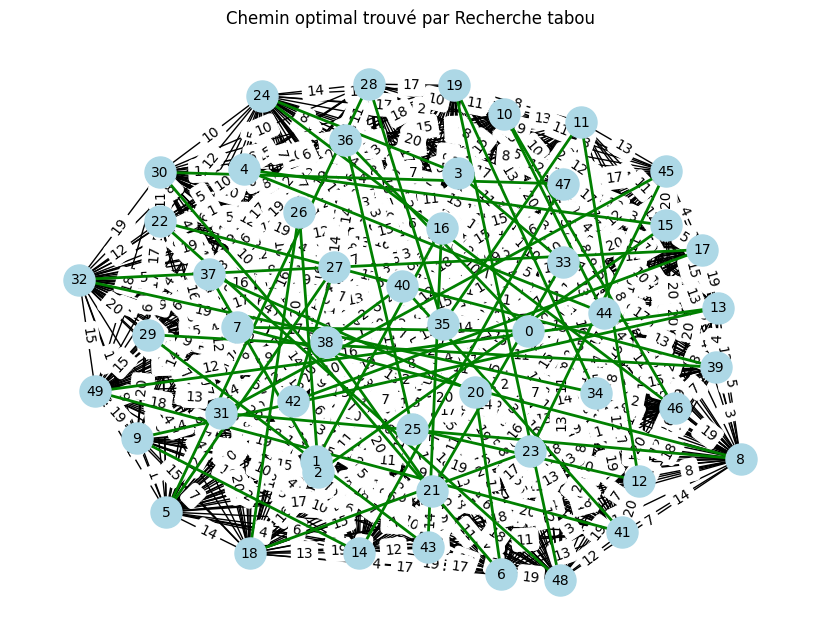

In [4]:
# Resolution du probleme TSP avec Recherche tabou (Tabu Search) 
import time  # Importer le module time pour mesurer le temps d'exécution

# Fonction pour générer un voisin en effectuant un échange 2-opt
def generate_neighbor_tabu(path):
    new_path = path[:]
    # Éviter d'échanger la ville de départ (0)
    i, j = sorted(random.sample(range(1, len(path)), 2))
    new_path[i:j+1] = reversed(new_path[i:j+1])
    return new_path

# Fonction de Recherche tabou
def tabu_search(graph, max_iterations, tabu_tenure):
    # Initialisation
    nodes = list(graph.nodes)
    nodes.remove(0)
    random.shuffle(nodes)
    current_path = [0] + nodes
    current_cost = calculate_path_length(graph, current_path)
    best_path = current_path[:]
    best_cost = current_cost
    tabu_list = []

    for iteration in range(max_iterations):
        neighbors = [generate_neighbor_tabu(current_path) for _ in range(100)]  # Générer plusieurs voisins
        neighbors_costs = [(neighbor, calculate_path_length(graph, neighbor)) for neighbor in neighbors]

        # Trier les voisins par coût
        neighbors_costs.sort(key=lambda x: x[1])

        # Sélectionner le meilleur voisin non tabou ou améliorer le meilleur chemin
        for neighbor, cost in neighbors_costs:
            if neighbor not in tabu_list or cost < best_cost:
                current_path = neighbor
                current_cost = cost
                break

        # Mettre à jour le meilleur chemin trouvé
        if current_cost < best_cost:
            best_path = current_path[:]
            best_cost = current_cost

        # Ajouter le chemin courant à la liste tabou
        tabu_list.append(current_path)
        if len(tabu_list) > tabu_tenure:
            tabu_list.pop(0)  # Supprimer les anciens éléments de la liste tabou

    return best_path, best_cost

# Paramètres pour la Recherche tabou
tabu_tenure = 10 # Durée de vie de la liste tabou
max_iterations = 100 # Nombre maximum d'itérations

# Exécution de l'algorithme
# Mesurer le temps d'exécution
start_time = time.time()  # Démarrer le timer

best_path_tabu, best_cost_tabu = tabu_search(tsp_graph, max_iterations, tabu_tenure)

end_time = time.time()  # Arrêter le timer
execution_time = end_time - start_time  # Calculer le temps d'exécution

# Affichage des résultats
print("Temps d'exécution de la Recherche tabou :", execution_time, "secondes")
print("Meilleur chemin trouvé par Recherche tabou :", best_path_tabu + [best_path_tabu[0]])
print("Coût du meilleur chemin :", best_cost_tabu)

# Visualisation du chemin emprunté
plt.figure(figsize=(8, 6))
nx.draw(tsp_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edge_labels(tsp_graph, pos, edge_labels=labels)

# Tracer le chemin en vert
path_edges_tabu = [(best_path_tabu[i], best_path_tabu[i + 1]) for i in range(len(best_path_tabu) - 1)] + [(best_path_tabu[-1], best_path_tabu[0])]
nx.draw_networkx_edges(tsp_graph, pos, edgelist=path_edges_tabu, edge_color='green', width=2)

plt.title("Chemin optimal trouvé par Recherche tabou")
plt.show()


### Explication du code : Résolution du TSP avec Recherche tabou (Tabu Search)

Ce code implémente l'algorithme de Recherche tabou pour résoudre le problème du voyageur de commerce (TSP). Voici une explication détaillée des différentes parties :

#### 1. **Fonction `generate_neighbor_tabu`**
- Cette fonction génère un voisin du chemin actuel en effectuant un échange 2-opt (inversion d'un sous-segment du chemin).
- Le premier nœud (ville de départ, ici 0) est fixé pour simplifier le problème.
- Deux indices aléatoires sont choisis pour inverser une partie du chemin.

#### 2. **Fonction `tabu_search`**
Cette fonction implémente l'algorithme de Recherche tabou pour trouver un cycle hamiltonien optimal.
- **Initialisation** :
    - Le chemin initial est généré en fixant le nœud 0 comme point de départ.
    - Le coût du chemin initial est calculé.
    - Le meilleur chemin et son coût sont initialisés avec le chemin actuel.
    - Une liste tabou (`tabu_list`) est utilisée pour mémoriser les solutions récemment visitées.
- **Boucle principale** :
    - À chaque itération, plusieurs voisins sont générés à l'aide de `generate_neighbor_tabu`.
    - Les voisins sont évalués en calculant leur coût total.
    - Les voisins sont triés par coût croissant.
    - Le meilleur voisin non tabou (ou améliorant le meilleur chemin) est sélectionné comme solution courante.
    - Si le coût de la solution courante est meilleur que le meilleur coût trouvé, le meilleur chemin est mis à jour.
    - La solution courante est ajoutée à la liste tabou.
    - Si la liste tabou dépasse la taille maximale (`tabu_tenure`), les solutions les plus anciennes sont supprimées.
- **Retour** :
    - La fonction retourne le meilleur chemin et son coût.

#### 3. **Exécution de l'algorithme**
- Les paramètres de l'algorithme (comme `max_iterations` et `tabu_tenure`) sont définis.
- L'algorithme est exécuté, et le temps d'exécution est mesuré.
- Les résultats (meilleur chemin et coût) sont affichés.

#### 4. **Visualisation**
- Le graphe TSP est dessiné avec les nœuds et les poids des arêtes.
- Le chemin optimal trouvé par l'algorithme est tracé en vert.

#### Points clés :
- **Recherche tabou** : Cet algorithme utilise une liste tabou pour éviter de revisiter les solutions récemment explorées, ce qui permet d'échapper aux optima locaux.
- **Fixation du nœud de départ** : Le nœud 0 est fixé comme point de départ pour simplifier le problème.
- **Visualisation** : Le chemin optimal est visualisé pour mieux comprendre les résultats.

Ce code est adapté pour résoudre des instances du TSP de petite taille et illustre bien le fonctionnement de la Recherche tabou.


#### GRASP (Greedy Randomized Adaptive Search Procedure)

Temps d'exécution de GRASP : 14.604990482330322 secondes
Meilleur chemin trouvé par GRASP : [0, 35, 11, 12, 25, 43, 28, 1, 16, 37, 46, 6, 30, 20, 10, 29, 41, 49, 3, 33, 21, 38, 13, 9, 7, 8, 22, 39, 42, 17, 32, 34, 48, 24, 18, 26, 2, 15, 19, 31, 45, 23, 4, 44, 27, 5, 40, 36, 47, 14, 0]
Coût du meilleur chemin : 80


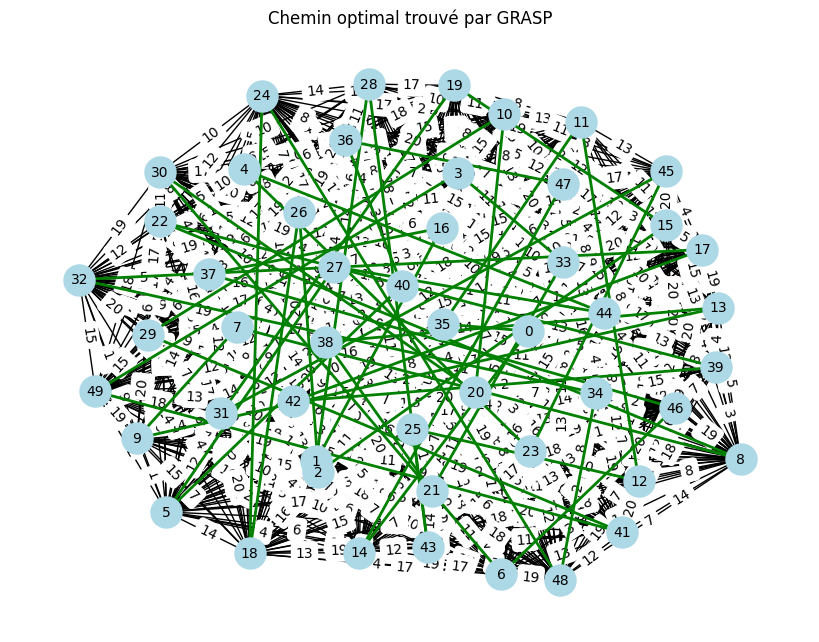

In [5]:
# Fonction pour résoudre le TSP avec le GRASP (Greedy Randomized Adaptive Search Procedure)

import time  # Importer le module time pour mesurer le temps d'exécution

# Fonction pour construire une solution initiale de manière gloutonne et aléatoire
def greedy_randomized_construction(graph, alpha):
    """
    Construit une solution initiale en utilisant une approche gloutonne et aléatoire.
    """
    nodes = list(graph.nodes)
    current_node = 0  # Commencer par le nœud 0
    solution = [current_node]
    remaining_nodes = set(nodes) - {current_node}

    while remaining_nodes:
        # Construire une liste triée des voisins restants en fonction des poids
        neighbors = [(neighbor, graph[current_node][neighbor]['weight']) for neighbor in remaining_nodes]
        neighbors.sort(key=lambda x: x[1])

        # Sélectionner un sous-ensemble restreint de candidats (RCL)
        rcl = neighbors[:max(1, int(alpha * len(neighbors)))]

        # Choisir un voisin aléatoire dans le RCL
        next_node = random.choice(rcl)[0]
        solution.append(next_node)
        remaining_nodes.remove(next_node)
        current_node = next_node

    return solution

# Fonction pour effectuer une recherche locale (2-opt)
def local_search_2opt(graph, path):
    """
    Améliore une solution donnée en utilisant la recherche locale 2-opt.
    """
    best_path = path[:]
    best_cost = calculate_path_length(graph, best_path)
    improved = True

    while improved:
        improved = False
        for i in range(1, len(path) - 1):
            for j in range(i + 1, len(path)):
                # Effectuer un échange 2-opt
                new_path = best_path[:]
                new_path[i:j+1] = reversed(new_path[i:j+1])
                new_cost = calculate_path_length(graph, new_path)

                if new_cost < best_cost:
                    best_path = new_path
                    best_cost = new_cost
                    improved = True

    return best_path, best_cost

# Fonction principale pour GRASP
def grasp_tsp(graph, max_iterations, alpha):
    """
    Implémente l'algorithme GRASP pour résoudre le TSP.
    """
    best_path = None
    best_cost = float('inf')

    for _ in range(max_iterations):
        # Phase de construction
        initial_solution = greedy_randomized_construction(graph, alpha)

        # Phase de recherche locale
        local_path, local_cost = local_search_2opt(graph, initial_solution)

        # Mettre à jour la meilleure solution trouvée
        if local_cost < best_cost:
            best_path = local_path
            best_cost = local_cost

    return best_path, best_cost

# Paramètres pour GRASP
alpha = 0.3  # Contrôle le degré de randomisation (0 = purement glouton, 1 = purement aléatoire)

# Exécution de l'algorithme GRASP
start_time = time.time()  # Démarrer le timer

best_path_grasp, best_cost_grasp = grasp_tsp(tsp_graph, max_iterations, alpha)

end_time = time.time()  # Arrêter le timer
execution_time_grasp = end_time - start_time  # Calculer le temps d'exécution

# Affichage des résultats
print("Temps d'exécution de GRASP :", execution_time_grasp, "secondes")
print("Meilleur chemin trouvé par GRASP :", best_path_grasp + [best_path_grasp[0]])
print("Coût du meilleur chemin :", best_cost_grasp)

# Visualisation du chemin emprunté
plt.figure(figsize=(8, 6))
nx.draw(tsp_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edge_labels(tsp_graph, pos, edge_labels=labels)

# Tracer le chemin en vert
path_edges_grasp = [(best_path_grasp[i], best_path_grasp[i + 1]) for i in range(len(best_path_grasp) - 1)] + [(best_path_grasp[-1], best_path_grasp[0])]
nx.draw_networkx_edges(tsp_graph, pos, edgelist=path_edges_grasp, edge_color='green', width=2)

plt.title("Chemin optimal trouvé par GRASP")
plt.show()

#### Fonction pour résoudre le TSP avec les Colonies de Fourmis
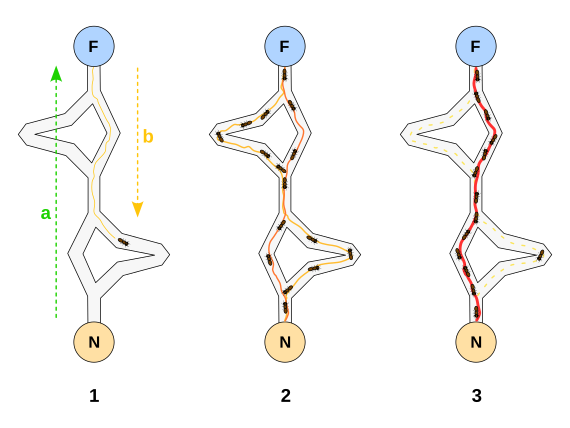

Temps d'exécution des Colonies de Fourmis : 6.018847942352295 secondes
Meilleur chemin trouvé par Colonies de Fourmis : [0, 14, 11, 25, 36, 47, 6, 20, 10, 29, 43, 15, 2, 26, 17, 32, 34, 46, 41, 49, 33, 3, 30, 35, 28, 1, 37, 16, 40, 5, 9, 13, 38, 21, 45, 42, 39, 22, 8, 31, 19, 48, 24, 18, 23, 4, 44, 27, 12, 7, 0]
Coût du meilleur chemin : 75


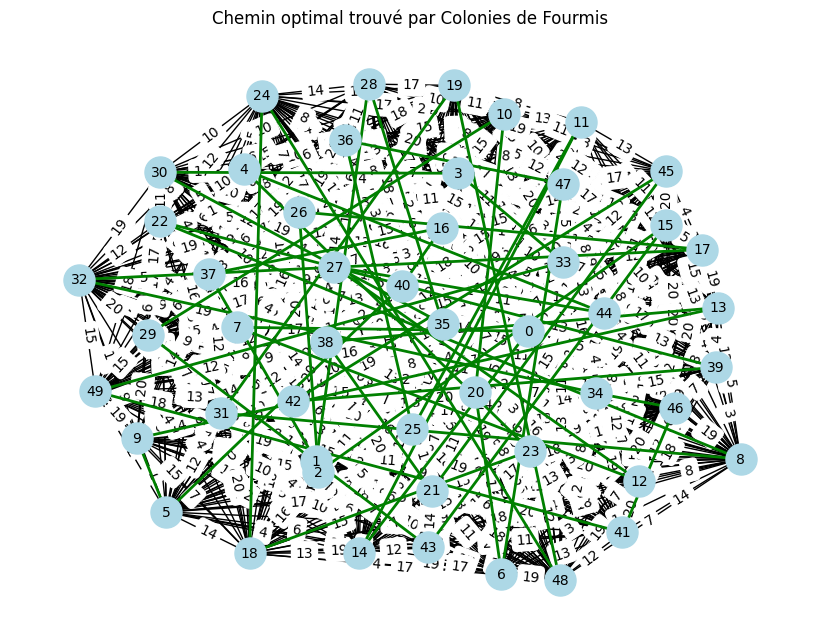

In [6]:
import numpy as np
import time

# Fonction pour résoudre le TSP avec les Colonies de Fourmis
def ant_colony_optimization(graph, num_ants, num_iterations, alpha, beta, evaporation_rate, pheromone_deposit):
    """
    Implémente l'algorithme des Colonies de Fourmis pour résoudre le TSP.
    """
    # Initialisation
    nodes = list(range(len(graph.nodes)))  # Ensure nodes are indexed from 0
    num_nodes = len(nodes)
    pheromone = np.ones((num_nodes, num_nodes))  # Matrice des phéromones
    best_path = None
    best_cost = float('inf')

    # Matrice des poids (distances)
    distances = np.zeros((num_nodes, num_nodes))
    for u, v, data in graph.edges(data=True):
        distances[u][v] = data['weight']
        distances[v][u] = data['weight']

    for iteration in range(num_iterations):
        all_paths = []
        all_costs = []

        for ant in range(num_ants):
            # Construction d'un chemin pour chaque fourmi
            current_node = 0
            path = [current_node]
            visited = set(path)

            while len(visited) < num_nodes:
                probabilities = []
                neighbors = [node for node in nodes if node not in visited]

                for neighbor in neighbors:
                    # Calcul de la probabilité de choisir un voisin
                    tau = pheromone[current_node][neighbor]  # Intensité des phéromones
                    eta = 1 / distances[current_node][neighbor]  # Attractivité (inverse de la distance)
                    probabilities.append((neighbor, (tau ** alpha) * (eta ** beta)))

                # Normalisation des probabilités
                total = sum(prob[1] for prob in probabilities)
                probabilities = [(node, prob / total) for node, prob in probabilities]

                # Sélection du prochain nœud
                next_node = np.random.choice(
                    [node for node, _ in probabilities],
                    p=[prob for _, prob in probabilities]
                )
                path.append(next_node)
                visited.add(next_node)
                current_node = next_node

            # Retour au point de départ
            path.append(0)
            cost = calculate_path_length(graph, path)
            all_paths.append(path)
            all_costs.append(cost)

            # Mise à jour du meilleur chemin
            if cost < best_cost:
                best_path = path
                best_cost = cost

        # Mise à jour des phéromones
        pheromone *= (1 - evaporation_rate)  # Évaporation
        for path, cost in zip(all_paths, all_costs):
            for i in range(len(path) - 1):
                u, v = path[i], path[i + 1]
                pheromone[u][v] += pheromone_deposit / cost
                pheromone[v][u] += pheromone_deposit / cost
    best_path = [int(node) for node in best_path]
    return [int(node) for node in best_path], best_cost

def calculate_path_length(graph, path):
    cost = 0
    for i in range(len(path) - 1):
        u, v = path[i], path[i + 1]
        cost += graph[u][v]['weight']
    return cost

# Paramètres pour les Colonies de Fourmis
num_ants = 20
num_iterations = 100
alpha = 1.0  # Importance des phéromones
beta = 2.0   # Importance de l'attractivité (inverse de la distance)
evaporation_rate = 0.5
pheromone_deposit = 100

# Exécution de l'algorithme
start_time = time.time()

# Reindex graph nodes to ensure they are integers starting from 0
tsp_graph = nx.convert_node_labels_to_integers(tsp_graph)

best_path_aco, best_cost_aco = ant_colony_optimization(
    tsp_graph, num_ants, num_iterations, alpha, beta, evaporation_rate, pheromone_deposit
)

end_time = time.time()
execution_time_aco = end_time - start_time

# Affichage des résultats
print("Temps d'exécution des Colonies de Fourmis :", execution_time_aco, "secondes")
print("Meilleur chemin trouvé par Colonies de Fourmis :", best_path_aco)
print("Coût du meilleur chemin :", best_cost_aco)

# Visualisation du chemin emprunté
plt.figure(figsize=(8, 6))
nx.draw(tsp_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edge_labels(tsp_graph, pos, edge_labels=labels)

# Tracer le chemin en vert
path_edges_aco = [(best_path_aco[i], best_path_aco[i + 1]) for i in range(len(best_path_aco) - 1)]
nx.draw_networkx_edges(tsp_graph, pos, edgelist=path_edges_aco, edge_color='green', width=2)

plt.title("Chemin optimal trouvé par Colonies de Fourmis")
plt.show()

In [7]:
# Comparaison des résultats des différentes méthodes
methods = [
    {"name": "Simulated Annealing ", "cost": best_cost_sa_fixed, "time": execution_time},
    {"name": "Tabu Search", "cost": best_cost_tabu, "time": execution_time},
    {"name": "GRASP", "cost": best_cost_grasp, "time": execution_time_grasp},
    {"name": "Ant Colony Optimization (ACO)", "cost": best_cost_aco, "time": execution_time_aco},
]

# Affichage des résultats
for method in methods:
    if method["name"] == "Simulated Annealing ":
        method["path"] = best_path_sa_fixed + [best_path_sa_fixed[0]]
    elif method["name"] == "Tabu Search":
        method["path"] = best_path_tabu + [best_path_tabu[0]]
    elif method["name"] == "GRASP":
        method["path"] = best_path_grasp + [best_path_grasp[0]]
    elif method["name"] == "Ant Colony Optimization (ACO)":
        method["path"] = best_path_aco

print("Comparaison des résultats des différentes méthodes :")
print(f"{'Méthode':<35}{'Coût':<10}{'Temps dexécution (s)':<20}{'Meilleur chemin':<50}")
print("-" * 115)
for method in methods:
    print(f"{method['name']:<35}{method['cost']:<10}{method['time']:<20.4f}{str(method['path']):<50}")


Comparaison des résultats des différentes méthodes :
Méthode                            Coût      Temps dexécution (s)Meilleur chemin                                   
-------------------------------------------------------------------------------------------------------------------
Simulated Annealing                153       0.3699              [0, 17, 42, 5, 34, 32, 13, 49, 3, 25, 43, 28, 15, 27, 8, 35, 37, 46, 33, 21, 38, 40, 41, 30, 9, 23, 45, 18, 26, 24, 11, 12, 6, 36, 47, 31, 19, 14, 4, 44, 7, 2, 10, 20, 29, 16, 1, 48, 22, 39, 0]
Tabu Search                        99        0.3699              [0, 36, 25, 12, 11, 35, 28, 5, 27, 42, 17, 32, 34, 19, 48, 22, 39, 29, 43, 16, 1, 37, 20, 6, 30, 47, 14, 9, 13, 49, 41, 40, 38, 21, 33, 3, 24, 46, 10, 44, 4, 15, 2, 26, 18, 23, 45, 31, 8, 7, 0]
GRASP                              80        14.6050             [0, 35, 11, 12, 25, 43, 28, 1, 16, 37, 46, 6, 30, 20, 10, 29, 41, 49, 3, 33, 21, 38, 13, 9, 7, 8, 22, 39, 42, 17, 32, 34, 48, 24, 18

# Optimisation du Ant Colony Optimization

In [9]:
import numpy as np
import time
import pandas as pd
from ipywidgets import IntProgress

# Fonction pour résoudre le TSP avec les Colonies de Fourmis
def ant_colony_optimization(graph, num_ants, num_iterations, alpha, beta, evaporation_rate, pheromone_deposit):
    """
    Implémente l'algorithme des Colonies de Fourmis pour résoudre le TSP.
    """
    # Initialisation
    nodes = list(range(len(graph.nodes)))  # Ensure nodes are indexed from 0
    num_nodes = len(nodes)
    pheromone = np.ones((num_nodes, num_nodes))  # Matrice des phéromones
    best_path = None
    best_cost = float('inf')

    # Matrice des poids (distances)
    distances = np.zeros((num_nodes, num_nodes))
    for u, v, data in graph.edges(data=True):
        distances[u][v] = data['weight']
        distances[v][u] = data['weight']

    for iteration in range(num_iterations):
        all_paths = []
        all_costs = []

        for ant in range(num_ants):
            # Construction d'un chemin pour chaque fourmi
            current_node = 0
            path = [current_node]
            visited = set(path)

            while len(visited) < num_nodes:
                probabilities = []
                neighbors = [node for node in nodes if node not in visited]

                for neighbor in neighbors:
                    # Calcul de la probabilité de choisir un voisin
                    tau = pheromone[current_node][neighbor]  # Intensité des phéromones
                    eta = 1 / distances[current_node][neighbor]  # Attractivité (inverse de la distance)
                    probabilities.append((neighbor, (tau ** alpha) * (eta ** beta)))

                # Normalisation des probabilités
                total = sum(prob[1] for prob in probabilities)
                probabilities = [(node, prob / total) for node, prob in probabilities]

                # Sélection du prochain nœud
                next_node = np.random.choice(
                    [node for node, _ in probabilities],
                    p=[prob for _, prob in probabilities]
                )
                path.append(next_node)
                visited.add(next_node)
                current_node = next_node

            # Retour au point de départ
            path.append(0)
            cost = calculate_path_length(graph, path)
            all_paths.append(path)
            all_costs.append(cost)

            # Mise à jour du meilleur chemin
            if cost < best_cost:
                best_path = path
                best_cost = cost

        # Mise à jour des phéromones
        pheromone *= (1 - evaporation_rate)  # Évaporation
        for path, cost in zip(all_paths, all_costs):
            for i in range(len(path) - 1):
                u, v = path[i], path[i + 1]
                pheromone[u][v] += pheromone_deposit / cost
                pheromone[v][u] += pheromone_deposit / cost
    best_path = [int(node) for node in best_path]
    return [int(node) for node in best_path], best_cost

def calculate_path_length(graph, path):
    cost = 0
    for i in range(len(path) - 1):
        u, v = path[i], path[i + 1]
        cost += graph[u][v]['weight']
    return cost

# Paramètres pour les Colonies de Fourmis
num_ants_list = [10, 20]
num_iterations_list = [50, 100]
alpha_list = [0.5, 1.0]
beta_list = [1.0, 2.0]
evaporation_rate_list = [0.3, 0.5]
pheromone_deposit_list = [50, 100]

results = []

nb_tests = len(num_ants_list) * len(num_iterations_list) * len(alpha_list) * len(beta_list) * len(evaporation_rate_list) * len(pheromone_deposit_list)

bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
display(bar)

# Tester différentes combinaisons de paramètres
for num_ants in num_ants_list:
    for num_iterations in num_iterations_list:
        for alpha in alpha_list:
            for beta in beta_list:
                for evaporation_rate in evaporation_rate_list:
                    for pheromone_deposit in pheromone_deposit_list:
                        start_time = time.time()
                        best_path, best_cost = ant_colony_optimization(
                            tsp_graph, num_ants, num_iterations, alpha, beta, evaporation_rate, pheromone_deposit
                        )
                        end_time = time.time()
                        execution_time = end_time - start_time
                        
                        # Ajouter les résultats dans une liste
                        results.append({
                            "num_ants": num_ants,
                            "num_iterations": num_iterations,
                            "alpha": alpha,
                            "beta": beta,
                            "evaporation_rate": evaporation_rate,
                            "pheromone_deposit": pheromone_deposit,
                            "best_cost": best_cost,
                            "execution_time": execution_time
                        })
                        bar.value += 1

# Convertir les résultats en DataFrame pour affichage
results_df = pd.DataFrame(results)

# Trier les résultats par coût optimal (best_cost) croissant
sorted_results_df = results_df.sort_values(by="best_cost")

# Sauvegarder les résultats triés dans un fichier texte
sorted_results_df.to_csv("sorted_results.txt", index=False, sep="\t")

# Afficher le tableau des résultats triés
print(sorted_results_df)








   




# # Visualisation du chemin emprunté
# plt.figure(figsize=(8, 6))
# nx.draw(tsp_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
# nx.draw_networkx_edge_labels(tsp_graph, pos, edge_labels=labels)

# # Tracer le chemin en vert
# path_edges_aco = [(best_path_aco[i], best_path_aco[i + 1]) for i in range(len(best_path_aco) - 1)]
# nx.draw_networkx_edges(tsp_graph, pos, edgelist=path_edges_aco, edge_color='green', width=2)

# plt.title("Chemin optimal trouvé par Colonies de Fourmis")
# plt.show()






IntProgress(value=0, layout=Layout(width='100%'), max=64)

    num_ants  num_iterations  alpha  beta  evaporation_rate  \
47        20              50    1.0   2.0               0.5   
30        10             100    1.0   2.0               0.5   
13        10              50    1.0   2.0               0.3   
59        20             100    1.0   1.0               0.5   
45        20              50    1.0   2.0               0.3   
..       ...             ...    ...   ...               ...   
0         10              50    0.5   1.0               0.3   
16        10             100    0.5   1.0               0.3   
1         10              50    0.5   1.0               0.3   
33        20              50    0.5   1.0               0.3   
32        20              50    0.5   1.0               0.3   

    pheromone_deposit  best_cost  execution_time  
47                100         74        3.243205  
30                 50         74        3.303140  
13                100         74        1.641613  
59                100         75       